### With memory we get a price war

In [45]:
# Betrand Game
n = 2
c1 = 1
c2 = 1
a0 = 0
a1 = c1+1
a2 = c2+1
mu = 4
xi = 0.1
k = 1
    
def quantity(p,p_,a,a_,mu,a0):
    num = np.exp((a-p)/mu)
    denom = np.exp((a-p)/mu)+np.exp((a_-p_)/mu)+np.exp(a0/mu)
    return num/denom
  
def profit(p,c,q):
    return (p-c)*q

for p in np.linspace(0.1,100,1000):
    #print(p, profit(p,c1,quantity(p,p,a1,a2,mu,a0)), profit(p,c2,quantity(p,p,a2,a1,mu,a0)))
    pass
pm = 7.2
pc = 1.0

In [54]:
import random
import numpy as np

# initialize Boltzmann Q-learning parameters
gamma = 0.99
alpha = 0.0001
initial_temperature = 1.0
temperature_decay = 0.99999
min_temperature = 0.01
temperature = initial_temperature

initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.01
eps = initial_eps

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the Q-table
num_states = 20
num_actions = 20
Q1 = np.ones((num_states, num_actions))
Q2 = np.ones((num_states, num_actions))
p1_history = []
p2_history = []
action2price = np.linspace(pc*0.8,pm*1.2,num_actions)

# run Boltzmann Q-learning for a fixed number of episodes
num_episodes = 100000
# initialize the state
state1 = 5
state2 = 5

In [71]:

for episode in range(num_episodes):

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1,temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2,temperature)
    else:
        action2 = np.random.choice(range(num_actions))

    price1 = action2price[action1]
    price2 = action2price[action2]

    # take the selected action and observe the next state and reward
    next_state1 = action2
    next_state2 = action1

    # rewards
    reward1 = profit(price1,c1,quantity(price1,price2,a1,a2,mu,a0))
    reward2 = profit(price2,c2,quantity(price2,price1,a2,a1,mu,a0))

    # update the Q-value for the selected action in the current state
    Q1[state1][action1] =  (1-alpha)*Q1[state1][action1] + alpha * (reward1 + gamma * np.max(Q1[next_state1]))
    Q2[state2][action2] =  (1-alpha)*Q2[state2][action2] + alpha * (reward2 + gamma * np.max(Q2[next_state2]))

    # move to the next state
    state1 = next_state1
    state2 = next_state2

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)

    print(state1, state2, action1, action2, temperature, eps)
    
    p1_history.append(price1)
    p2_history.append(price2)

12 12 12 12 0.01239091230141477 0.01239091230141477
12 12 12 12 0.012390788392291756 0.012390788392291756
12 12 12 12 0.012390664484407834 0.012390664484407834
12 12 12 12 0.01239054057776299 0.01239054057776299
12 12 12 12 0.012390416672357213 0.012390416672357213
12 12 12 12 0.01239029276819049 0.01239029276819049
12 12 12 12 0.012390168865262808 0.012390168865262808
12 12 12 12 0.012390044963574156 0.012390044963574156
12 12 12 12 0.012389921063124521 0.012389921063124521
12 12 12 12 0.01238979716391389 0.01238979716391389
12 12 12 12 0.012389673265942251 0.012389673265942251
12 12 12 12 0.012389549369209593 0.012389549369209593
12 12 12 12 0.012389425473715902 0.012389425473715902
12 12 12 12 0.012389301579461165 0.012389301579461165
12 12 12 12 0.01238917768644537 0.01238917768644537
12 12 12 12 0.012389053794668507 0.012389053794668507
12 12 12 12 0.01238892990413056 0.01238892990413056
12 12 12 12 0.01238880601483152 0.01238880601483152
12 12 12 12 0.012388682126771373 0.0123886

12 12 12 12 0.012233073922292902 0.012233073922292902
12 12 12 12 0.01223295159155368 0.01223295159155368
12 12 12 12 0.012232829262037765 0.012232829262037765
12 12 12 12 0.012232706933745145 0.012232706933745145
12 12 12 12 0.012232584606675808 0.012232584606675808
12 12 12 12 0.012232462280829743 0.012232462280829743
12 12 12 12 0.012232339956206935 0.012232339956206935
12 12 12 12 0.012232217632807373 0.012232217632807373
12 12 12 12 0.012232095310631045 0.012232095310631045
12 12 12 12 0.01223197298967794 0.01223197298967794
12 12 12 12 0.012231850669948042 0.012231850669948042
12 12 12 12 0.012231728351441344 0.012231728351441344
12 12 12 12 0.01223160603415783 0.01223160603415783
12 12 12 12 0.012231483718097489 0.012231483718097489
12 12 12 12 0.012231361403260308 0.012231361403260308
12 12 12 12 0.012231239089646276 0.012231239089646276
12 12 12 12 0.01223111677725538 0.01223111677725538
12 12 12 12 0.012230994466087608 0.012230994466087608
12 12 12 12 0.012230872156142948 0.0

12 12 12 12 0.012119227174829902 0.012119227174829902
12 12 12 12 0.012119105982558154 0.012119105982558154
12 12 12 12 0.01211898479149833 0.01211898479149833
12 12 12 12 0.012118863601650416 0.012118863601650416
12 12 12 12 0.0121187424130144 0.0121187424130144
12 12 12 12 0.012118621225590272 0.012118621225590272
12 12 12 12 0.012118500039378016 0.012118500039378016
12 12 12 12 0.012118378854377622 0.012118378854377622
12 12 12 12 0.012118257670589078 0.012118257670589078
12 12 12 12 0.012118136488012372 0.012118136488012372
12 12 12 12 0.012118015306647491 0.012118015306647491
12 12 12 12 0.012117894126494425 0.012117894126494425
12 12 12 12 0.01211777294755316 0.01211777294755316
12 12 12 12 0.012117651769823684 0.012117651769823684
12 12 12 12 0.012117530593305986 0.012117530593305986
12 12 12 12 0.012117409418000054 0.012117409418000054
12 12 12 12 0.012117288243905875 0.012117288243905875
12 12 12 12 0.012117167071023437 0.012117167071023437
12 12 12 12 0.012117045899352728 0.0

12 12 12 12 0.012002718500682913 0.012002718500682913
12 12 12 12 0.012002598473497906 0.012002598473497906
12 12 12 12 0.012002478447513171 0.012002478447513171
12 12 12 12 0.012002358422728697 0.012002358422728697
12 12 12 12 0.01200223839914447 0.01200223839914447
12 12 12 12 0.012002118376760478 0.012002118376760478
12 12 12 12 0.01200199835557671 0.01200199835557671
12 12 12 12 0.012001878335593155 0.012001878335593155
12 12 12 12 0.012001758316809798 0.012001758316809798
12 12 12 12 0.012001638299226632 0.012001638299226632
12 12 12 12 0.01200151828284364 0.01200151828284364
12 12 12 12 0.012001398267660812 0.012001398267660812
12 12 12 12 0.012001278253678136 0.012001278253678136
12 12 12 12 0.0120011582408956 0.0120011582408956
12 12 12 12 0.012001038229313192 0.012001038229313192
12 12 12 12 0.012000918218930899 0.012000918218930899
12 12 12 12 0.01200079820974871 0.01200079820974871
12 12 12 12 0.012000678201766613 0.012000678201766613
12 12 12 12 0.012000558194984596 0.01200

12 12 12 12 0.01189375081106207 0.01189375081106207
12 12 12 12 0.01189363187355396 0.01189363187355396
12 12 12 12 0.011893512937235225 0.011893512937235225
12 12 12 12 0.011893394002105854 0.011893394002105854
12 12 12 12 0.011893275068165832 0.011893275068165832
12 12 12 12 0.011893156135415152 0.011893156135415152
12 12 12 12 0.011893037203853797 0.011893037203853797
12 12 12 12 0.011892918273481759 0.011892918273481759
12 12 12 12 0.011892799344299024 0.011892799344299024
12 12 12 12 0.011892680416305581 0.011892680416305581
12 12 12 12 0.011892561489501418 0.011892561489501418
12 12 12 12 0.011892442563886524 0.011892442563886524
12 12 12 12 0.011892323639460885 0.011892323639460885
12 12 12 12 0.011892204716224491 0.011892204716224491
12 12 12 12 0.01189208579417733 0.01189208579417733
12 12 12 12 0.01189196687331939 0.01189196687331939
12 12 12 12 0.011891847953650657 0.011891847953650657
12 12 12 12 0.011891729035171121 0.011891729035171121
12 12 12 12 0.01189161011788077 0.01

12 12 12 12 0.011788365561908739 0.011788365561908739
12 12 12 12 0.01178824767825312 0.01178824767825312
12 12 12 12 0.011788129795776339 0.011788129795776339
12 12 12 12 0.011788011914478381 0.011788011914478381
12 12 12 12 0.011787894034359236 0.011787894034359236
12 12 12 12 0.011787776155418893 0.011787776155418893
12 12 12 12 0.01178765827765734 0.01178765827765734
12 12 12 12 0.011787540401074563 0.011787540401074563
12 12 12 12 0.011787422525670553 0.011787422525670553
12 12 12 12 0.011787304651445297 0.011787304651445297
12 12 12 12 0.011787186778398783 0.011787186778398783
12 12 12 12 0.011787068906530999 0.011787068906530999
12 12 12 12 0.011786951035841934 0.011786951035841934
12 12 12 12 0.011786833166331575 0.011786833166331575
12 12 12 12 0.011786715297999913 0.011786715297999913
12 12 12 12 0.011786597430846934 0.011786597430846934
12 12 12 12 0.011786479564872625 0.011786479564872625
12 12 12 12 0.011786361700076978 0.011786361700076978
12 12 12 12 0.011786243836459978

12 12 12 12 0.011735319476829735 0.011735319476829735
12 12 12 12 0.011735202123634967 0.011735202123634967
12 12 12 12 0.011735084771613731 0.011735084771613731
12 12 12 12 0.011734967420766015 0.011734967420766015
12 12 12 12 0.011734850071091808 0.011734850071091808
12 12 12 12 0.011734732722591098 0.011734732722591098
12 12 12 12 0.011734615375263872 0.011734615375263872
12 12 12 12 0.01173449802911012 0.01173449802911012
12 12 12 12 0.01173438068412983 0.01173438068412983
12 12 12 12 0.011734263340322989 0.011734263340322989
12 12 12 12 0.011734145997689585 0.011734145997689585
12 12 12 12 0.01173402865622961 0.01173402865622961
12 12 12 12 0.011733911315943047 0.011733911315943047
12 12 12 12 0.011733793976829889 0.011733793976829889
12 12 12 12 0.011733676638890122 0.011733676638890122
12 12 12 12 0.011733559302123733 0.011733559302123733
12 12 12 12 0.011733441966530712 0.011733441966530712
12 12 12 12 0.011733324632111047 0.011733324632111047
12 12 12 12 0.011733207298864727 0

12 12 12 12 0.011675387897217162 0.011675387897217162
12 12 12 12 0.011675271143338191 0.011675271143338191
12 12 12 12 0.011675154390626758 0.011675154390626758
12 13 13 12 0.011675037639082854 0.011675037639082854
13 12 12 13 0.011674920888706463 0.011674920888706463
12 15 15 12 0.011674804139497575 0.011674804139497575
12 12 12 12 0.011674687391456181 0.011674687391456181
12 12 12 12 0.011674570644582266 0.011674570644582266
12 12 12 12 0.01167445389887582 0.01167445389887582
12 12 12 12 0.011674337154336833 0.011674337154336833
12 12 12 12 0.01167422041096529 0.01167422041096529
12 12 12 12 0.011674103668761182 0.011674103668761182
12 12 12 12 0.011673986927724495 0.011673986927724495
12 12 12 12 0.011673870187855219 0.011673870187855219
12 12 12 12 0.01167375344915334 0.01167375344915334
12 12 12 12 0.011673636711618848 0.011673636711618848
12 12 12 12 0.011673519975251732 0.011673519975251732
12 12 12 12 0.01167340324005198 0.01167340324005198
12 12 12 12 0.01167328650601958 0.01

12 12 12 12 0.011606357379607024 0.011606357379607024
12 12 12 12 0.011606241316033229 0.011606241316033229
12 12 12 12 0.01160612525362007 0.01160612525362007
12 12 12 12 0.011606009192367534 0.011606009192367534
12 12 12 12 0.011605893132275611 0.011605893132275611
12 12 12 12 0.011605777073344288 0.011605777073344288
12 12 12 12 0.011605661015573556 0.011605661015573556
12 12 12 12 0.0116055449589634 0.0116055449589634
12 12 12 12 0.011605428903513812 0.011605428903513812
12 12 12 12 0.011605312849224777 0.011605312849224777
12 12 12 12 0.011605196796096284 0.011605196796096284
12 12 12 12 0.011605080744128323 0.011605080744128323
12 12 12 12 0.011604964693320882 0.011604964693320882
12 12 12 12 0.01160484864367395 0.01160484864367395
12 12 12 12 0.011604732595187513 0.011604732595187513
12 12 12 12 0.011604616547861562 0.011604616547861562
12 12 12 12 0.011604500501696084 0.011604500501696084
12 12 12 12 0.011604384456691067 0.011604384456691067
12 12 12 12 0.011604268412846501 0.0

12 12 12 12 0.011533120809498833 0.011533120809498833
12 12 12 12 0.01153300547829074 0.01153300547829074
12 12 12 12 0.011532890148235957 0.011532890148235957
12 12 12 12 0.011532774819334474 0.011532774819334474
12 12 12 12 0.011532659491586281 0.011532659491586281
12 12 12 12 0.011532544164991367 0.011532544164991367
12 12 12 12 0.011532428839549717 0.011532428839549717
12 12 12 12 0.011532313515261322 0.011532313515261322
12 12 12 12 0.01153219819212617 0.01153219819212617
12 12 12 12 0.011532082870144249 0.011532082870144249
12 12 12 12 0.011531967549315549 0.011531967549315549
12 12 12 12 0.011531852229640056 0.011531852229640056
12 12 12 12 0.01153173691111776 0.01153173691111776
12 12 12 12 0.01153162159374865 0.01153162159374865
12 12 12 12 0.011531506277532712 0.011531506277532712
12 12 12 12 0.011531390962469938 0.011531390962469938
12 12 12 12 0.011531275648560314 0.011531275648560314
12 12 12 12 0.011531160335803828 0.011531160335803828
12 12 12 12 0.01153104502420047 0.01

12 12 12 12 0.011462180176307837 0.011462180176307837
12 12 12 12 0.011462065554506075 0.011462065554506075
12 12 12 12 0.01146195093385053 0.01146195093385053
12 12 12 12 0.011461836314341192 0.011461836314341192
12 12 12 12 0.011461721695978049 0.011461721695978049
12 12 12 12 0.01146160707876109 0.01146160707876109
12 12 12 12 0.011461492462690303 0.011461492462690303
12 12 12 12 0.011461377847765677 0.011461377847765677
12 12 12 12 0.0114612632339872 0.0114612632339872
12 12 12 12 0.01146114862135486 0.01146114862135486
12 12 12 12 0.011461034009868648 0.011461034009868648
12 12 12 12 0.011460919399528549 0.011460919399528549
12 12 12 12 0.011460804790334555 0.011460804790334555
12 12 12 12 0.011460690182286652 0.011460690182286652
12 12 12 12 0.011460575575384829 0.011460575575384829
12 12 12 12 0.011460460969629075 0.011460460969629075
12 12 12 12 0.011460346365019379 0.011460346365019379
12 12 12 12 0.01146023176155573 0.01146023176155573
12 12 12 12 0.011460117159238115 0.01146

12 12 12 12 0.01139463813707514 0.01139463813707514
12 12 12 12 0.01139452419069377 0.01139452419069377
12 12 12 12 0.011394410245451863 0.011394410245451863
12 12 12 12 0.011394296301349409 0.011394296301349409
12 12 12 12 0.011394182358386396 0.011394182358386396
12 12 12 12 0.011394068416562812 0.011394068416562812
12 12 12 12 0.011393954475878647 0.011393954475878647
12 12 12 12 0.01139384053633389 0.01139384053633389
12 12 12 12 0.011393726597928526 0.011393726597928526
12 7 7 12 0.011393612660662546 0.011393612660662546
11 12 12 11 0.01139349872453594 0.01139349872453594
12 14 14 12 0.011393384789548695 0.011393384789548695
13 12 12 13 0.0113932708557008 0.0113932708557008
12 15 15 12 0.011393156922992245 0.011393156922992245
12 12 12 12 0.011393042991423016 0.011393042991423016
12 12 12 12 0.011392929060993102 0.011392929060993102
12 12 12 12 0.011392815131702493 0.011392815131702493
12 12 12 12 0.011392701203551178 0.011392701203551178
12 12 12 12 0.011392587276539143 0.0113925

12 12 12 12 0.011312551593343262 0.011312551593343262
12 12 12 12 0.01131243846782733 0.01131243846782733
12 12 12 12 0.011312325343442653 0.011312325343442653
12 12 12 12 0.011312212220189218 0.011312212220189218
12 12 12 12 0.011312099098067017 0.011312099098067017
12 12 12 12 0.011311985977076036 0.011311985977076036
12 12 12 12 0.011311872857216266 0.011311872857216266
12 12 12 12 0.011311759738487694 0.011311759738487694
12 12 12 12 0.01131164662089031 0.01131164662089031
12 12 12 12 0.011311533504424102 0.011311533504424102
12 12 12 12 0.011311420389089059 0.011311420389089059
12 12 12 12 0.011311307274885168 0.011311307274885168
12 12 12 12 0.01131119416181242 0.01131119416181242
12 12 12 12 0.011311081049870803 0.011311081049870803
12 12 12 12 0.011310967939060305 0.011310967939060305
12 12 12 12 0.011310854829380915 0.011310854829380915
12 12 12 12 0.011310741720832622 0.011310741720832622
12 12 12 12 0.011310628613415414 0.011310628613415414
12 12 12 12 0.01131051550712928 0.

12 12 12 12 0.011243642290858592 0.011243642290858592
12 12 12 12 0.011243529854435684 0.011243529854435684
12 12 12 12 0.01124341741913714 0.01124341741913714
12 12 12 12 0.011243304984962949 0.011243304984962949
12 12 12 12 0.0112431925519131 0.0112431925519131
12 12 12 12 0.011243080119987581 0.011243080119987581
12 12 12 12 0.011242967689186383 0.011242967689186383
12 12 12 12 0.011242855259509492 0.011242855259509492
12 12 12 12 0.011242742830956897 0.011242742830956897
12 12 12 12 0.011242630403528587 0.011242630403528587
12 12 12 12 0.011242517977224552 0.011242517977224552
12 12 12 12 0.01124240555204478 0.01124240555204478
12 12 12 12 0.01124229312798926 0.01124229312798926
12 12 12 12 0.011242180705057982 0.011242180705057982
12 12 12 12 0.011242068283250932 0.011242068283250932
12 12 12 12 0.0112419558625681 0.0112419558625681
12 12 12 12 0.011241843443009474 0.011241843443009474
12 12 12 12 0.011241731024575045 0.011241731024575045
12 12 12 12 0.0112416186072648 0.011241618

12 12 12 12 0.011172917924422335 0.011172917924422335
12 12 12 12 0.011172806195243091 0.011172806195243091
12 12 12 12 0.01117269446718114 0.01117269446718114
12 12 12 12 0.011172582740236468 0.011172582740236468
12 12 12 12 0.011172471014409066 0.011172471014409066
12 12 12 12 0.011172359289698923 0.011172359289698923
12 12 12 12 0.011172247566106026 0.011172247566106026
12 12 12 12 0.011172135843630367 0.011172135843630367
12 12 12 12 0.011172024122271931 0.011172024122271931
12 12 12 12 0.01117191240203071 0.01117191240203071
12 12 12 12 0.01117180068290669 0.01117180068290669
12 12 12 12 0.011171688964899862 0.011171688964899862
12 12 12 12 0.011171577248010213 0.011171577248010213
12 12 12 12 0.011171465532237733 0.011171465532237733
12 12 12 12 0.011171353817582412 0.011171353817582412
12 12 12 12 0.011171242104044236 0.011171242104044236
12 12 12 12 0.011171130391623197 0.011171130391623197
12 12 12 12 0.011171018680319281 0.011171018680319281
12 12 12 12 0.011170906970132479 0

12 12 12 12 0.011105858674086389 0.011105858674086389
12 12 12 12 0.011105747615499649 0.011105747615499649
12 12 12 12 0.011105636558023494 0.011105636558023494
12 12 12 12 0.011105525501657915 0.011105525501657915
12 12 12 12 0.011105414446402898 0.011105414446402898
12 12 12 12 0.011105303392258434 0.011105303392258434
12 12 12 12 0.011105192339224513 0.011105192339224513
12 12 12 12 0.011105081287301121 0.011105081287301121
12 12 12 12 0.01110497023648825 0.01110497023648825
12 12 12 12 0.011104859186785885 0.011104859186785885
12 12 12 12 0.011104748138194018 0.011104748138194018
12 12 12 12 0.011104637090712636 0.011104637090712636
12 12 12 12 0.01110452604434173 0.01110452604434173
12 12 12 12 0.011104414999081286 0.011104414999081286
12 12 12 12 0.011104303954931297 0.011104303954931297
12 12 12 12 0.011104192911891748 0.011104192911891748
12 12 12 12 0.01110408186996263 0.01110408186996263
12 12 12 12 0.01110397082914393 0.01110397082914393
12 12 12 12 0.011103859789435639 0.0

12 12 12 12 0.011036663172584508 0.011036663172584508
12 12 12 12 0.011036552805952782 0.011036552805952782
12 12 12 12 0.011036442440424723 0.011036442440424723
12 12 12 12 0.01103633207600032 0.01103633207600032
12 12 12 12 0.01103622171267956 0.01103622171267956
12 12 12 12 0.011036111350462435 0.011036111350462435
12 12 12 12 0.01103600098934893 0.01103600098934893
12 12 12 12 0.011035890629339037 0.011035890629339037
15 12 12 15 0.011035780270432744 0.011035780270432744
12 14 14 12 0.01103566991263004 0.01103566991263004
13 12 12 13 0.011035559555930914 0.011035559555930914
12 15 15 12 0.011035449200335355 0.011035449200335355
12 12 12 12 0.011035338845843352 0.011035338845843352
12 12 12 12 0.011035228492454894 0.011035228492454894
12 12 12 12 0.01103511814016997 0.01103511814016997
12 12 12 12 0.011035007788988568 0.011035007788988568
12 12 12 12 0.011034897438910679 0.011034897438910679
12 12 12 12 0.01103478708993629 0.01103478708993629
12 12 12 12 0.011034676742065392 0.01103

12 14 14 12 0.010972067410824776 0.010972067410824776
13 12 12 13 0.010971957690150668 0.010971957690150668
12 15 15 12 0.010971847970573767 0.010971847970573767
12 12 12 12 0.010971738252094063 0.010971738252094063
12 12 12 12 0.010971628534711543 0.010971628534711543
12 12 12 12 0.010971518818426196 0.010971518818426196
12 12 12 12 0.010971409103238012 0.010971409103238012
12 12 12 12 0.010971299389146979 0.010971299389146979
12 12 12 12 0.010971189676153088 0.010971189676153088
12 12 12 12 0.010971079964256327 0.010971079964256327
12 12 12 12 0.010970970253456686 0.010970970253456686
12 12 12 12 0.010970860543754152 0.010970860543754152
12 12 12 12 0.010970750835148715 0.010970750835148715
12 12 12 12 0.010970641127640365 0.010970641127640365
12 12 12 12 0.010970531421229088 0.010970531421229088
12 12 12 12 0.010970421715914877 0.010970421715914877
12 12 12 12 0.010970312011697719 0.010970312011697719
12 12 12 12 0.010970202308577603 0.010970202308577603
12 12 12 12 0.01097009260655

12 12 12 12 0.010903596464143121 0.010903596464143121
12 12 12 12 0.01090348742817848 0.01090348742817848
12 12 12 12 0.010903378393304198 0.010903378393304198
12 12 12 12 0.010903269359520266 0.010903269359520266
12 12 12 12 0.010903160326826672 0.010903160326826672
12 12 12 12 0.010903051295223403 0.010903051295223403
12 12 12 12 0.010902942264710452 0.010902942264710452
12 12 12 12 0.010902833235287806 0.010902833235287806
12 12 12 12 0.010902724206955454 0.010902724206955454
12 12 12 12 0.010902615179713384 0.010902615179713384
12 12 12 12 0.010902506153561588 0.010902506153561588
12 12 12 12 0.010902397128500054 0.010902397128500054
12 12 12 12 0.010902288104528769 0.010902288104528769
12 12 12 12 0.010902179081647725 0.010902179081647725
12 12 12 12 0.01090207005985691 0.01090207005985691
12 12 12 12 0.010901961039156312 0.010901961039156312
12 12 12 12 0.01090185201954592 0.01090185201954592
12 12 12 12 0.010901743001025725 0.010901743001025725
12 12 12 12 0.010901633983595714 0

12 12 12 12 0.010844116320584891 0.010844116320584891
12 12 12 12 0.010844007879421686 0.010844007879421686
12 12 12 12 0.010843899439342893 0.010843899439342893
12 12 12 12 0.0108437910003485 0.0108437910003485
12 12 12 12 0.010843682562438495 0.010843682562438495
12 12 12 12 0.01084357412561287 0.01084357412561287
12 12 12 12 0.010843465689871615 0.010843465689871615
12 12 12 12 0.010843357255214717 0.010843357255214717
12 12 12 12 0.010843248821642166 0.010843248821642166
12 12 12 12 0.01084314038915395 0.01084314038915395
12 12 12 12 0.01084303195775006 0.01084303195775006
12 12 12 12 0.010842923527430482 0.010842923527430482
12 12 12 12 0.010842815098195208 0.010842815098195208
12 12 12 12 0.010842706670044226 0.010842706670044226
12 12 12 12 0.010842598242977525 0.010842598242977525
12 12 12 12 0.010842489816995097 0.010842489816995097
12 12 12 12 0.010842381392096928 0.010842381392096928
12 12 12 12 0.010842272968283008 0.010842272968283008
12 12 12 12 0.010842164545553326 0.010

12 12 12 12 0.010779353897111557 0.010779353897111557
12 12 12 12 0.010779246103572587 0.010779246103572587
12 12 12 12 0.010779138311111552 0.010779138311111552
12 12 12 12 0.010779030519728441 0.010779030519728441
12 12 12 12 0.010778922729423244 0.010778922729423244
12 12 12 12 0.01077881494019595 0.01077881494019595
12 12 12 12 0.01077870715204655 0.01077870715204655
12 12 12 12 0.01077859936497503 0.01077859936497503
12 12 12 12 0.01077849157898138 0.01077849157898138
12 12 12 12 0.01077838379406559 0.01077838379406559
12 12 12 12 0.01077827601022765 0.01077827601022765
12 12 12 12 0.010778168227467548 0.010778168227467548
12 12 12 12 0.010778060445785274 0.010778060445785274
12 12 12 12 0.010777952665180817 0.010777952665180817
12 12 12 12 0.010777844885654166 0.010777844885654166
12 12 12 12 0.01077773710720531 0.01077773710720531
12 12 12 12 0.010777629329834238 0.010777629329834238
12 12 12 12 0.01077752155354094 0.01077752155354094
12 12 12 12 0.010777413778325405 0.010777413

12 12 12 12 0.01072119476403852 0.01072119476403852
12 12 12 12 0.01072108755209088 0.01072108755209088
12 12 12 12 0.01072098034121536 0.01072098034121536
12 12 12 12 0.010720873131411948 0.010720873131411948
12 12 12 12 0.010720765922680633 0.010720765922680633
12 12 12 12 0.010720658715021408 0.010720658715021408
12 12 12 12 0.010720551508434258 0.010720551508434258
12 12 12 12 0.010720444302919175 0.010720444302919175
12 12 12 12 0.010720337098476146 0.010720337098476146
12 12 12 12 0.010720229895105161 0.010720229895105161
12 12 12 12 0.01072012269280621 0.01072012269280621
12 12 12 12 0.010720015491579282 0.010720015491579282
12 12 12 12 0.010719908291424366 0.010719908291424366
12 12 12 12 0.010719801092341451 0.010719801092341451
12 12 12 12 0.010719693894330529 0.010719693894330529
12 12 12 12 0.010719586697391585 0.010719586697391585
12 12 12 12 0.010719479501524612 0.010719479501524612
12 12 12 12 0.010719372306729598 0.010719372306729598
12 12 12 12 0.010719265113006532 0.0

12 12 12 12 0.010661216956575953 0.010661216956575953
12 12 12 12 0.010661110344406389 0.010661110344406389
12 12 12 12 0.010661003733302945 0.010661003733302945
12 12 12 12 0.010660897123265612 0.010660897123265612
12 12 12 12 0.01066079051429438 0.01066079051429438
12 12 12 12 0.010660683906389237 0.010660683906389237
12 12 12 12 0.010660577299550174 0.010660577299550174
12 12 12 12 0.010660470693777178 0.010660470693777178
12 12 12 12 0.010660364089070241 0.010660364089070241
12 12 12 12 0.01066025748542935 0.01066025748542935
12 12 12 12 0.010660150882854496 0.010660150882854496
12 12 12 12 0.010660044281345668 0.010660044281345668
12 12 12 12 0.010659937680902854 0.010659937680902854
12 12 12 12 0.010659831081526046 0.010659831081526046
12 12 12 12 0.01065972448321523 0.01065972448321523
12 12 12 12 0.0106596178859704 0.0106596178859704
12 12 12 12 0.01065951128979154 0.01065951128979154
12 12 12 12 0.010659404694678642 0.010659404694678642
12 12 12 12 0.010659298100631695 0.01065

12 12 12 12 0.010596063270933632 0.010596063270933632
12 12 12 12 0.010595957310300923 0.010595957310300923
12 12 12 12 0.010595851350727822 0.010595851350727822
12 12 12 12 0.010595745392214315 0.010595745392214315
12 12 12 12 0.010595639434760393 0.010595639434760393
12 12 12 12 0.010595533478366045 0.010595533478366045
12 12 12 12 0.010595427523031262 0.010595427523031262
12 12 12 12 0.010595321568756031 0.010595321568756031
12 12 12 12 0.010595215615540344 0.010595215615540344
12 12 12 12 0.01059510966338419 0.01059510966338419
12 12 12 12 0.010595003712287556 0.010595003712287556
12 12 12 12 0.010594897762250434 0.010594897762250434
12 12 12 12 0.010594791813272811 0.010594791813272811
12 12 12 12 0.01059468586535468 0.01059468586535468
12 12 12 12 0.010594579918496027 0.010594579918496027
12 12 12 12 0.010594473972696843 0.010594473972696843
12 12 12 12 0.010594368027957117 0.010594368027957117
12 12 12 12 0.010594262084276839 0.010594262084276839
12 12 12 12 0.010594156141655996

12 12 12 12 0.010532571596808756 0.010532571596808756
12 12 12 12 0.010532466271092788 0.010532466271092788
12 12 12 12 0.010532360946430078 0.010532360946430078
12 12 12 12 0.010532255622820614 0.010532255622820614
12 12 12 12 0.010532150300264385 0.010532150300264385
12 12 12 12 0.010532044978761384 0.010532044978761384
12 12 12 12 0.010531939658311597 0.010531939658311597
12 12 12 12 0.010531834338915014 0.010531834338915014
12 12 12 12 0.010531729020571626 0.010531729020571626
12 12 12 12 0.010531623703281421 0.010531623703281421
12 12 12 12 0.01053151838704439 0.01053151838704439
12 12 12 12 0.01053141307186052 0.01053141307186052
12 12 12 12 0.010531307757729801 0.010531307757729801
12 12 12 12 0.010531202444652225 0.010531202444652225
12 12 12 12 0.010531097132627778 0.010531097132627778
12 12 12 12 0.010530991821656453 0.010530991821656453
12 12 12 12 0.010530886511738237 0.010530886511738237
12 12 12 12 0.010530781202873119 0.010530781202873119
12 12 12 12 0.010530675895061091

12 12 12 12 0.010472915874498528 0.010472915874498528
12 12 12 12 0.010472811145339784 0.010472811145339784
12 12 12 12 0.010472706417228332 0.010472706417228332
12 12 12 12 0.01047260169016416 0.01047260169016416
12 12 12 12 0.010472496964147258 0.010472496964147258
1 12 12 1 0.010472392239177617 0.010472392239177617
12 18 18 12 0.010472287515255226 0.010472287515255226
15 12 12 15 0.010472182792380073 0.010472182792380073
12 14 14 12 0.01047207807055215 0.01047207807055215
6 12 12 6 0.010471973349771445 0.010471973349771445
12 8 8 12 0.010471868630037948 0.010471868630037948
15 12 12 15 0.010471763911351647 0.010471763911351647
12 14 14 12 0.010471659193712533 0.010471659193712533
13 12 12 13 0.010471554477120597 0.010471554477120597
12 15 15 12 0.010471449761575827 0.010471449761575827
12 12 12 12 0.010471345047078213 0.010471345047078213
12 12 12 12 0.010471240333627743 0.010471240333627743
12 12 12 12 0.010471135621224408 0.010471135621224408
12 12 12 12 0.010471030909868196 0.010

12 12 12 12 0.010406727296412037 0.010406727296412037
12 12 12 12 0.010406623229139073 0.010406623229139073
12 12 12 12 0.010406519162906781 0.010406519162906781
12 12 12 12 0.010406415097715152 0.010406415097715152
12 12 12 12 0.010406311033564175 0.010406311033564175
12 12 12 12 0.01040620697045384 0.01040620697045384
12 12 12 12 0.010406102908384136 0.010406102908384136
12 12 12 12 0.010405998847355052 0.010405998847355052
12 12 12 12 0.010405894787366579 0.010405894787366579
12 12 12 12 0.010405790728418705 0.010405790728418705
12 12 12 12 0.010405686670511421 0.010405686670511421
12 12 12 12 0.010405582613644717 0.010405582613644717
12 12 12 12 0.01040547855781858 0.01040547855781858
12 12 12 12 0.010405374503033003 0.010405374503033003
12 12 12 12 0.010405270449287973 0.010405270449287973
12 12 12 12 0.01040516639658348 0.01040516639658348
12 12 12 12 0.010405062344919514 0.010405062344919514
12 12 12 12 0.010404958294296066 0.010404958294296066
12 12 12 12 0.010404854244713123 0

12 12 12 12 0.010346542681271713 0.010346542681271713
12 12 12 12 0.0103464392158449 0.0103464392158449
12 12 12 12 0.010346335751452742 0.010346335751452742
12 0 0 12 0.010346232288095229 0.010346232288095229
8 12 12 8 0.010346128825772348 0.010346128825772348
12 15 15 12 0.01034602536448409 0.01034602536448409
12 12 12 12 0.010345921904230447 0.010345921904230447
12 12 12 12 0.010345818445011404 0.010345818445011404
12 12 12 12 0.010345714986826954 0.010345714986826954
12 12 12 12 0.010345611529677086 0.010345611529677086
12 12 12 12 0.01034550807356179 0.01034550807356179
12 12 12 12 0.010345404618481055 0.010345404618481055
12 12 12 12 0.010345301164434871 0.010345301164434871
12 12 12 12 0.010345197711423228 0.010345197711423228
12 12 12 12 0.010345094259446115 0.010345094259446115
12 12 12 12 0.010344990808503521 0.010344990808503521
12 12 12 12 0.010344887358595437 0.010344887358595437
12 12 12 12 0.010344783909721851 0.010344783909721851
12 12 12 12 0.010344680461882754 0.01034

12 12 12 12 0.010287220479020401 0.010287220479020401
12 12 12 12 0.010287117606815612 0.010287117606815612
12 12 12 12 0.010287014735639545 0.010287014735639545
12 12 12 12 0.01028691186549219 0.01028691186549219
12 12 12 12 0.010286808996373535 0.010286808996373535
12 12 12 12 0.010286706128283573 0.010286706128283573
12 12 12 12 0.01028660326122229 0.01028660326122229
12 12 12 12 0.010286500395189678 0.010286500395189678
12 12 12 12 0.010286397530185726 0.010286397530185726
12 12 12 12 0.010286294666210425 0.010286294666210425
12 12 12 12 0.010286191803263763 0.010286191803263763
12 12 12 12 0.010286088941345731 0.010286088941345731
12 12 12 12 0.010285986080456317 0.010285986080456317
12 12 12 12 0.010285883220595513 0.010285883220595513
12 12 12 12 0.010285780361763308 0.010285780361763308
12 12 12 12 0.010285677503959692 0.010285677503959692
12 12 12 12 0.010285574647184652 0.010285574647184652
12 12 12 12 0.01028547179143818 0.01028547179143818
12 12 12 12 0.010285368936720265 0

12 12 12 12 0.010214030956380488 0.010214030956380488
12 12 12 12 0.010213928816070925 0.010213928816070925
12 12 12 12 0.010213826676782764 0.010213826676782764
12 12 12 12 0.010213724538515996 0.010213724538515996
12 12 12 12 0.01021362240127061 0.01021362240127061
12 12 12 12 0.010213520265046598 0.010213520265046598
12 12 12 12 0.010213418129843948 0.010213418129843948
12 12 12 12 0.01021331599566265 0.01021331599566265
12 12 12 12 0.010213213862502695 0.010213213862502695
12 12 12 12 0.01021311173036407 0.01021311173036407
12 12 12 12 0.010213009599246767 0.010213009599246767
12 12 12 12 0.010212907469150776 0.010212907469150776
12 12 12 12 0.010212805340076085 0.010212805340076085
12 12 12 12 0.010212703212022686 0.010212703212022686
12 12 12 12 0.010212601084990567 0.010212601084990567
12 12 12 12 0.010212498958979717 0.010212498958979717
12 12 12 12 0.010212396833990127 0.010212396833990127
12 12 12 12 0.010212294710021788 0.010212294710021788
12 12 12 12 0.010212192587074688 0

12 12 12 12 0.010155773184092106 0.010155773184092106
12 12 12 12 0.010155671626360266 0.010155671626360266
12 12 12 12 0.010155570069644002 0.010155570069644002
12 12 12 12 0.010155468513943305 0.010155468513943305
12 12 12 12 0.010155366959258167 0.010155366959258167
12 12 12 12 0.010155265405588575 0.010155265405588575
12 12 12 12 0.01015516385293452 0.01015516385293452
12 12 12 12 0.010155062301295991 0.010155062301295991
12 12 12 12 0.010154960750672978 0.010154960750672978
12 12 12 12 0.010154859201065472 0.010154859201065472
12 12 12 12 0.010154757652473461 0.010154757652473461
12 12 12 12 0.010154656104896936 0.010154656104896936
12 12 12 12 0.010154554558335888 0.010154554558335888
12 12 12 12 0.010154453012790304 0.010154453012790304
12 12 12 12 0.010154351468260176 0.010154351468260176
12 12 12 12 0.010154249924745494 0.010154249924745494
12 12 12 12 0.010154148382246247 0.010154148382246247
12 12 12 12 0.010154046840762425 0.010154046840762425
12 12 12 12 0.0101539453002940

12 15 15 12 0.010096636021601888 0.010096636021601888
12 12 12 12 0.010096535055241673 0.010096535055241673
12 12 12 12 0.01009643408989112 0.01009643408989112
12 12 12 12 0.010096333125550222 0.010096333125550222
12 12 12 12 0.010096232162218968 0.010096232162218968
12 12 12 12 0.010096131199897346 0.010096131199897346
12 12 12 12 0.010096030238585348 0.010096030238585348
12 12 12 12 0.010095929278282963 0.010095929278282963
12 12 12 12 0.010095828318990181 0.010095828318990181
12 12 12 12 0.01009572736070699 0.01009572736070699
12 12 12 12 0.010095626403433384 0.010095626403433384
12 12 12 12 0.01009552544716935 0.01009552544716935
12 12 12 12 0.010095424491914879 0.010095424491914879
12 12 12 12 0.01009532353766996 0.01009532353766996
12 12 12 12 0.010095222584434585 0.010095222584434585
12 12 12 12 0.01009512163220874 0.01009512163220874
12 12 12 12 0.010095020680992418 0.010095020680992418
12 12 12 12 0.010094919730785608 0.010094919730785608
12 12 12 12 0.010094818781588301 0.010

12 12 12 12 0.010034230224118385 0.010034230224118385
12 12 12 12 0.010034129881816144 0.010034129881816144
12 12 12 12 0.010034029540517325 0.010034029540517325
12 12 12 12 0.010033929200221921 0.010033929200221921
12 12 12 12 0.01003382886092992 0.01003382886092992
12 12 12 12 0.010033728522641311 0.010033728522641311
12 12 12 12 0.010033628185356086 0.010033628185356086
12 12 12 12 0.010033527849074233 0.010033527849074233
12 12 12 12 0.010033427513795743 0.010033427513795743
12 12 12 12 0.010033327179520605 0.010033327179520605
12 12 12 12 0.01003322684624881 0.01003322684624881
12 12 12 12 0.010033126513980348 0.010033126513980348
12 12 12 12 0.010033026182715208 0.010033026182715208
12 12 12 12 0.010032925852453382 0.010032925852453382
12 12 12 12 0.010032825523194858 0.010032825523194858
12 12 12 12 0.010032725194939626 0.010032725194939626
12 12 12 12 0.010032624867687677 0.010032624867687677
12 12 12 12 0.010032524541439 0.010032524541439
12 12 12 12 0.010032424216193587 0.010

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 9 9 12 0.01 0.01
14 12 12 14 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
18 12 12 18 0.01 0.01
12 16 16 12 0.01 0.01
14 12 12 14 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
16 12 12 16 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
2 12 12 2 0.01 0.01
12 19 19 12 0.01 0.01
9 12 12 9 0.01 0.01
12 13 13 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 3 3 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
0 12 12 0 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
15 12 12 15 0.01 0.01
12 11 11 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 4 4 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
4 12 12 4 0.01 0.01
12 17 17 12 0.01 0.01
11 12 12 11 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
5 12 12 5 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 1 1 12 0.01 0.01
10 12 12 10 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 6 6 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
11 12 12 11 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
3 12 12 3 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 

13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 9 9 12 0.01 0.01
14 12 12 14 0.01 0.01
12 14 14 12 0.01 0.01
13 12 12 13 0.01 0.01
12 15 15 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 18 18 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 12 0.01 0.01
12 12 12 1

KeyboardInterrupt: 

In [67]:
np.round(Q1,1)

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1,
        1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
       [1. , 1. , 1. , 1. , 1. , 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1

In [68]:
Q2

array([[0.9962543 , 1.0064595 , 1.01535032, 1.02495519, 1.03467388,
        1.03754482, 1.04710069, 1.05428828, 1.06139955, 1.06144472,
        1.06144632, 1.06822651, 1.06301558, 1.07422973, 1.06739076,
        1.06099167, 1.05968122, 1.0550709 , 1.06193299, 1.05125495],
       [0.99591306, 1.00631605, 1.0156404 , 1.02502265, 1.03656294,
        1.04143157, 1.05229039, 1.06296559, 1.05979139, 1.06831393,
        1.06438293, 1.07544704, 1.07515568, 1.06901068, 1.06387118,
        1.0764507 , 1.06138494, 1.06425801, 1.06203849, 1.05696722],
       [0.99636799, 1.00726883, 1.01696506, 1.02680963, 1.03480641,
        1.04574609, 1.05123547, 1.05684716, 1.06142867, 1.06981652,
        1.06924869, 1.07192539, 1.08214628, 1.0825993 , 1.06966544,
        1.07201801, 1.06993359, 1.07032599, 1.0638278 , 1.05633367],
       [0.9964905 , 1.00711397, 1.01758205, 1.02790208, 1.03458311,
        1.04327394, 1.05311846, 1.05999611, 1.06284047, 1.07856994,
        1.08015816, 1.08132102, 1.0915013 , 1

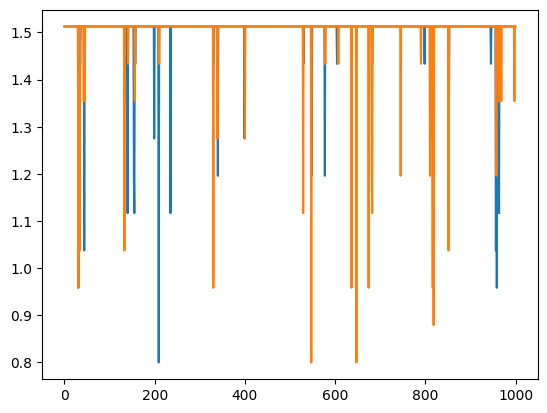

In [37]:
import matplotlib.pyplot as plt
plt.plot(p1_history[-1000:])
plt.plot(p2_history[-1000:])
plt.show()

In [72]:
def boltzmann_action_probs(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    return probs

for state1 in range(0,10):
    print(np.round(boltzmann_action_probs(Q1, state1, temperature),2))

[0.   0.   0.   0.   0.   0.   0.01 0.02 0.02 0.06 0.14 0.22 0.06 0.06
 0.19 0.06 0.07 0.03 0.02 0.03]
[0.   0.   0.   0.   0.   0.   0.01 0.02 0.02 0.05 0.03 0.07 0.04 0.15
 0.38 0.12 0.05 0.02 0.03 0.01]
[0.   0.   0.   0.   0.   0.   0.01 0.01 0.02 0.02 0.06 0.28 0.05 0.22
 0.1  0.05 0.07 0.03 0.02 0.03]
[0.   0.   0.   0.   0.   0.   0.01 0.01 0.02 0.09 0.13 0.08 0.14 0.24
 0.09 0.08 0.06 0.03 0.03 0.02]
[0.   0.   0.   0.   0.   0.   0.01 0.01 0.02 0.11 0.05 0.13 0.13 0.03
 0.23 0.05 0.04 0.16 0.03 0.02]
[0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.04 0.03 0.38 0.1  0.09
 0.09 0.05 0.05 0.04 0.09 0.02]
[0.   0.   0.   0.   0.   0.   0.   0.01 0.02 0.01 0.06 0.07 0.55 0.06
 0.07 0.05 0.06 0.02 0.02 0.01]
[0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.01 0.13 0.01 0.23
 0.01 0.56 0.02 0.01 0.01 0.  ]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.78 0.01 0.04
 0.01 0.1  0.02 0.01 0.   0.  ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [70]:
for state1 in range(0,20):
    print(np.round(boltzmann_action_probs(Q1, state1, temperature),2))

[0.   0.   0.   0.   0.01 0.01 0.02 0.03 0.03 0.07 0.13 0.14 0.08 0.07
 0.13 0.08 0.09 0.04 0.03 0.04]
[0.   0.   0.   0.   0.01 0.01 0.01 0.03 0.04 0.05 0.05 0.08 0.06 0.17
 0.2  0.12 0.07 0.04 0.04 0.02]
[0.   0.   0.   0.   0.   0.01 0.02 0.03 0.03 0.04 0.07 0.18 0.07 0.16
 0.11 0.07 0.09 0.05 0.04 0.04]
[0.   0.   0.   0.   0.   0.01 0.01 0.01 0.03 0.09 0.12 0.09 0.13 0.17
 0.09 0.07 0.06 0.04 0.04 0.03]
[0.   0.   0.   0.   0.   0.01 0.01 0.02 0.03 0.11 0.07 0.13 0.1  0.04
 0.18 0.06 0.05 0.13 0.04 0.03]
[0.   0.   0.   0.   0.   0.   0.01 0.03 0.02 0.05 0.04 0.22 0.11 0.12
 0.1  0.07 0.06 0.06 0.08 0.03]
[0.   0.   0.   0.   0.   0.   0.01 0.02 0.03 0.02 0.07 0.1  0.29 0.1
 0.11 0.09 0.08 0.03 0.04 0.02]
[0.   0.   0.   0.   0.   0.   0.   0.01 0.02 0.02 0.03 0.21 0.03 0.25
 0.03 0.28 0.04 0.03 0.03 0.01]
[0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.01 0.05 0.41 0.04 0.1
 0.04 0.21 0.08 0.02 0.   0.01]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99
 0. 

In [42]:
# impulse response
num_episodes = 30
state1 = 9
state2 = 3
p1_impulse=[]
p2_impulse=[]
for episode in range(num_episodes):
    if episode == 0:
        action1 = boltzmann_action_selection(Q1, state1,temperature)
        action2 = 4
    else:
        action1 = boltzmann_action_selection(Q1, state1,temperature)
        action2 = boltzmann_action_selection(Q2, state2,temperature)

    price1 = action2price[action1]
    price2 = action2price[action2]

    # take the selected action and observe the next state and reward
    next_state1 = action2
    next_state2 = action1

    # rewards
    reward1 = profit(price1,c1,quantity(price1,price2,a1,a2,mu,a0))
    reward2 = profit(price2,c2,quantity(price2,price1,a2,a1,mu,a0))

    # move to the next state
    state1 = next_state1
    state2 = next_state2

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)
    
    p1_impulse.append(price1)
    p2_impulse.append(price2)

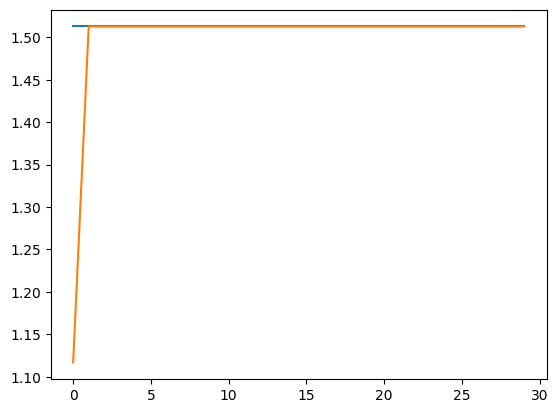

In [43]:
import matplotlib.pyplot as plt
plt.plot(p1_impulse)
plt.plot(p2_impulse)
plt.show()